In [22]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [23]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
diab_df=pd.read_csv('diabetes.csv')
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
X=diab_df.iloc[:,0:8]
Y=diab_df.iloc[:,8]
mod=LogisticRegression(random_state=13,max_iter=10000).fit(X,Y)
print('The Intercept is', mod.intercept_)
print('The coefficients are',mod.coef_)

The Intercept is [-8.36595928]
The coefficients are [[ 1.22498231e-01  3.51114036e-02 -1.33001192e-02  7.78282397e-04
  -1.17404779e-03  8.96742827e-02  8.68004603e-01  1.49846727e-02]]


In [25]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40408666), 'w1': array(0.12319458), 'w2': array(0.03516252), 'w3': array(-0.01328593), 'w4': array(0.0006153), 'w5': array(-0.00119126), 'w6': array(0.08968044), 'w7': array(0.94526838), 'w8': array(0.01485546)}


### Explanation of the code
#### The code is training a logistic regression model and find point estimates of each coefficients for that we need posteriors which are calculated from prior and likelihood. We assign prior probabilities of each coefficients using Normal Distribution and then use the formula to calculate the likelihood using a Bernoulli distribution
#### The prior probabilities of the interecept and coefficients are having probabilities following the normal distribution with mean = 0 and std dev = 1000
#### Bernoulli distribution is the distribution used for Likelihood
#### pm.invlogit(linreg) calculates the sigmoid funcion value for x=linreg. sigmoid(x)=1/(1+exp(-x)). The value of which would be between 0 and 1, which could be treated as a value of probability.
#### map_est is a dictionary of the point estimates of  coefficients and intercept values of the regression model which provides the best model which is found using the find_MAP function which finds local maximum a posterior point given the model

/var/folders/7g/kfrtkcdn1k14y4tgq08c6j900000gn/T/ipykernel_5622/560008163.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(400,step=pm.Metropolis())
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 12 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w0'}>,
        <AxesSubplot:title={'center':'w1'}>,
        <AxesSubplot:title={'center':'w2'}>],
       [<AxesSubplot:title={'center':'w3'}>,
        <AxesSubplot:title={'center':'w4'}>,
        <AxesSubplot:title={'center':'w5'}>],
       [<AxesSubplot:title={'center':'w6'}>,
        <AxesSubplot:title={'center':'w7'}>,
        <AxesSubplot:title={'center':'w8'}>]], dtype=object)

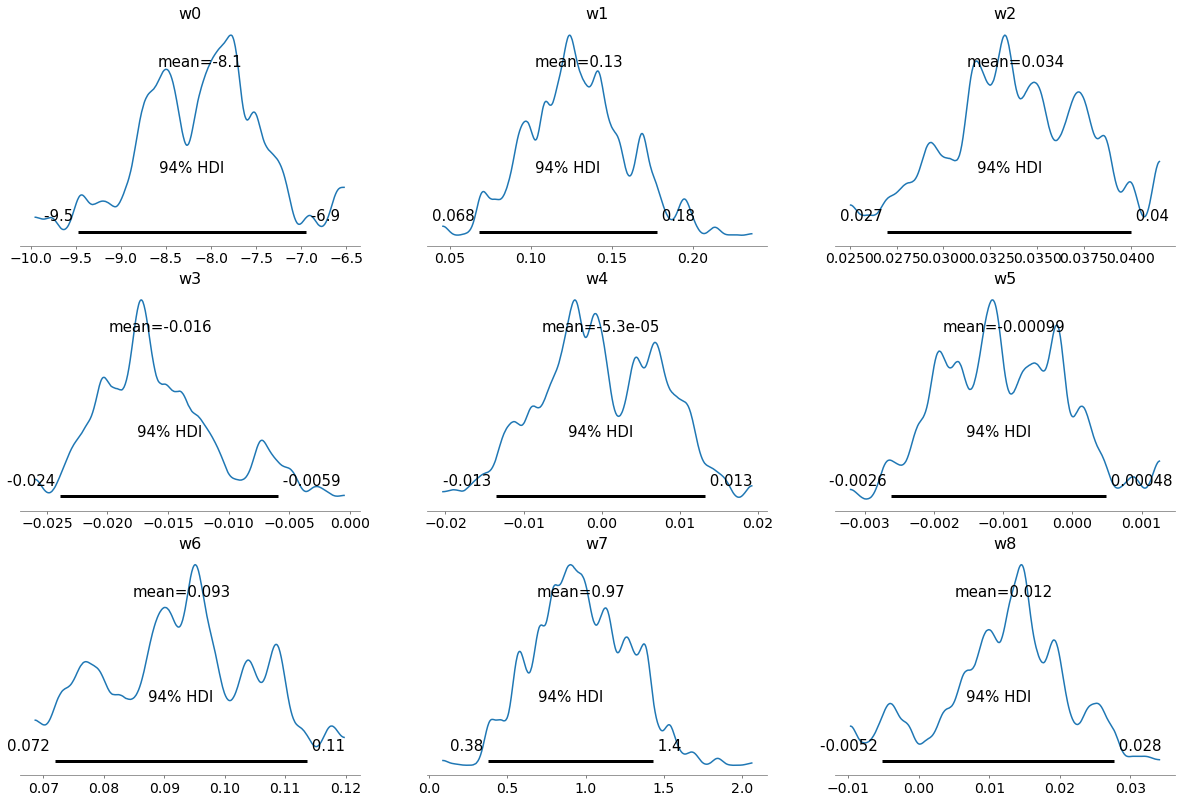

In [28]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    trace = pm.sample(400,step=pm.Metropolis())
## Explain the output of the plot 
az.plot_posterior(trace)

#### The plots are posterior probability distribution of each coefficient and the intercept which shows the various values the coefficients and the intercept can take with the posterior probability of each value. The plots provide a 94% High Density Interval of each coefficient and the intercept which means that the values in this interval their probabilities add upto 94%.

## GitHub Link
#### 